<a href="https://colab.research.google.com/github/varunk04/Deep_learning_with_Tensorflow/blob/main/02_NN_Classification_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NN classification with tensorflow:

A classification problem is to classify something to one thing or another.

A few types of classifcation problems are:
* Binary classifcation
* Multiclass classification
* Multilable Classification 


## Creating data:

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples:
n_samples = 1000

# create circles:
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [ ]:
# Checking out the features:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Checking the lables:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Lets visualize the data for better understanding:

In [ ]:
import pandas as pd

circles = pd.DataFrame({'X0':X[:,0], 'X1': X[:,1], 'label':y})

circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


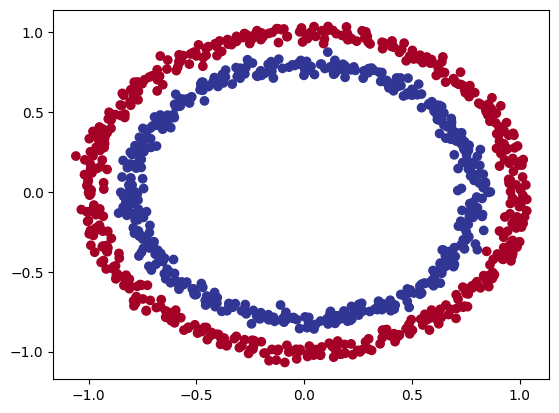

In [ ]:
# Visualize using the plots:

import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c= y, cmap = plt.cm.RdYlBu);
plt.show()

## Input and Output shapes:

In [ ]:
# Checking the shapes of the input and outputs:

X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X.dtype, y.dtype

(dtype('float64'), dtype('int64'))

## Steps in Modelling:

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
# Settting the seed
tf.random.set_seed(42)

# Step 1 : building the model:
model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1)
    ]
)

# Step 2: Compiling the model:

model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['accuracy']
)

# step 3 : Fit the model:
model_1.fit(tf.cast(X, tf.float32), tf.cast(y, tf.int32), epochs = 5)

Epoch 1/5
32/32 [==============================] - 5s 3ms/step - loss: 1.6770 - accuracy: 0.4580
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7116 - accuracy: 0.4870
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7002 - accuracy: 0.4880
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.4900
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4830


The Accuracy is pretty low, it is almost as if the model is guessing.

In [ ]:
# Lets try to improve the model:

# Lets train it for longer time by increasing the number of epochs.
model_1.fit(X, y, epochs = 200, verbose = 0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Hmmm even training the model for long time accuarcy is not increasing.

In [ ]:
# Lets build a new model with increased number of layers.

# Step 1 building the model:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Step 2 compiling the model:
model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['accuracy']
)

# Step 3 fitting the model:
model_2.fit(X, y, epochs = 100, verbose = 0)

In [ ]:
# Lets evaluate the model, since we haev given verbose = 0.
model_2.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934530138969421, 0.5]

Even adding the new layers isnt helping in increasing the accuracy.

## Improving the model:

Following are some general steps taken to improve the model:

1. Incresing the number of layers and number of neurons in the layers.
2. By trying other optimizers.
3. By training for longer time.

In [ ]:
# Set the random seed:
tf.random.set_seed(42)

# 1. Creating the model:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model:
model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# 3. fitting the model with data:
model_3.fit(X, y, epochs= 100, verbose = 0)

In [ ]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6999 - accuracy: 0.5100


[0.6998974084854126, 0.5099999904632568]

To Visualize the mode, predictions, lets build a fucntion.

* Take in a trained model, features (X) adn labels (y)
* create a mesh grid of X values
* make predictions across the mesh grid
* Plot predicstions as well as a line between zones.

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  plot the descion boundary created by model predictions on X.
  """

  # defining the axis boundaries of the plot and create the meshgrid.
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values:
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make predictions:
  y_pred = model.predict(x_in)

  # checking for multi-class:
  
  if len(y_pred[0]) > 1:
    print('doing the multiclass classification')
    # We have to reshape our predoictions to get them ready for plotting.
    y_pred = np.ardgmax(y_pred, axis = 1).reshape(xx.shape)

  else:
    print('Binary Calssification:')

    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundaries:
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:,0],X[:,1], c = y, s = 40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
Binary Calssification:


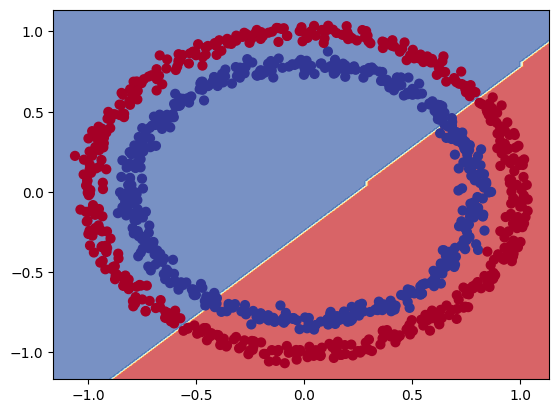

In [ ]:
# checking out the predictions our mdoel is making:

plot_decision_boundary(model = model_3,
                       X = X,
                       y = y)

Now thats the issue, if we see our model is predicting a straing line wheere as our data is circular.

Hence there is model accuarcy of 50%.

Since my model is best suited fro linear data lets try to chech it on linear data by building a linear regressiuon problem:

In [ ]:
# Setting the seed:
tf.random.set_seed(42)

# Create some regression data:

x_reg = tf.range(0,1000,5)
y_reg = tf.range(100,1100,5)

# Lets split the data:
x_reg_train = x_reg[:150]
x_reg_test = x_reg[150:]

y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

In [ ]:
# Fit our model to build model_3:

model_3.fit(x_reg_train,y_reg_train, epochs = 100, verbose = 0)

ValueError: ignored

Since we are using the classifiocation optmizer the code is producing the above error!

We have to tweak our model a little.


In [ ]:
# Set the random seed:
tf.random.set_seed(42)

# 1. Creating the model:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model:
model_4.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

# 3. Fitting the model:
model_4.fit(tf.expand_dims(x_reg_train, axis = -1),y_reg_train, epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 7ms/step - loss: 381.0438 - mae: 381.0438
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 290.6795 - mae: 290.6795
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 202.2990 - mae: 202.2990
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 109.2189 - mae: 109.2189
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 47.3036 - mae: 47.3036
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 74.8358 - mae: 74.8358
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 67.3522 - mae: 67.3522
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 45.2514 - mae: 45.2514
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 47.6581 - mae: 47.6581
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 43.6442 - mae: 43.6442
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 7ms/step


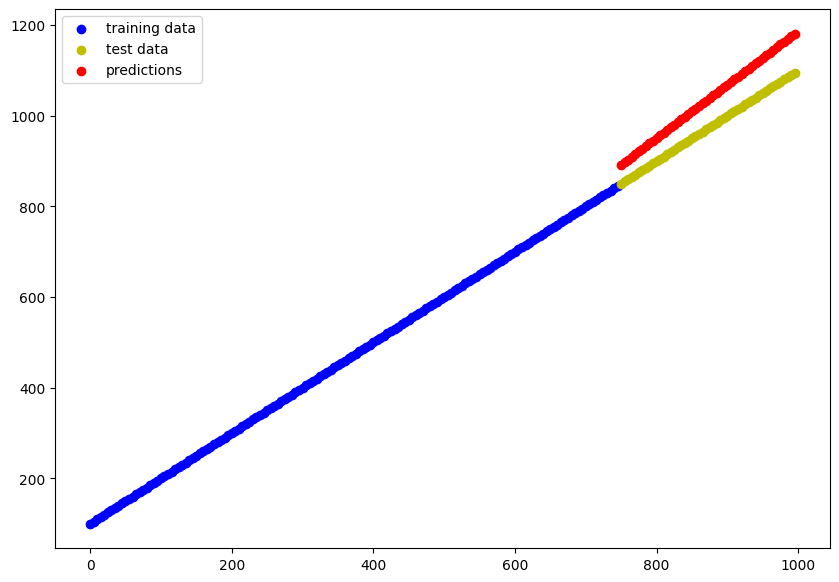

In [ ]:
# make predictions with our trained model.

y_reg_preds = model_4.predict(x_reg_test)

# Lets plot the models predictions:

plt.figure(figsize = (10,7))
plt.scatter(x_reg_train, y_reg_train, c='b', label = 'training data')
plt.scatter(x_reg_test, y_reg_test, c= 'y', label = 'test data')
plt.scatter(x_reg_test, y_reg_preds, c = 'r', label = 'predictions')
plt.legend()

### Missing piece : Non - Linearlity

lets introduced the activation functions in our neural layers, we will start by adding the liner layer.

In [ ]:
# Set the random seed:
tf.random.set_seed(42)

# 1. create the model:

model_5 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1, activation = tf.keras.activations.linear)
    ]
)

# 2. compile the model:

model_5.compile(loss= 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['accuracy']
                )
# 3. fitting the data:

model_5.fit(X, y, epochs= 100)

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 6.4127 - accuracy: 0.4890
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 6.4009 - accuracy: 0.4890
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 6.3901 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 6.3866 - accuracy: 0.4900
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 6.3768 - accuracy: 0.4890
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 6.3627 - accuracy: 0.4880
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 6.3563 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 6.3520 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 6.3519 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 6.3317 - accuracy: 0.4870
Epoch 11/

313/313 [==============================] - 0s 1ms/step
Binary Calssification:


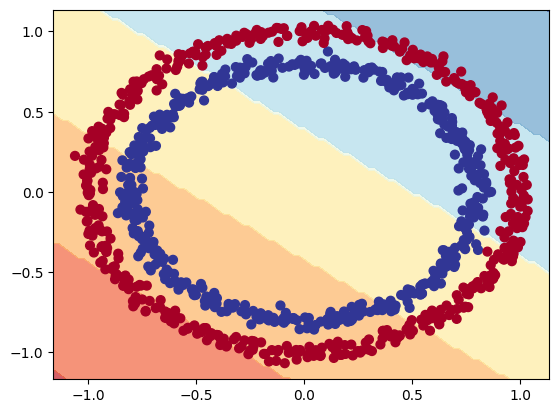

In [ ]:
plot_decision_boundary(model = model_5,
                       X = X,
                       y = y)

Lets try to build our NN with **NON LINEAR** activation function:

In [ ]:
# Set the random seed:
tf.random.set_seed(42)

# 1. create the model:

model_6 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)
    ]
)

# 2. compile the model:

model_6.compile(loss= 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['accuracy']
                )
# 3. fitting the data:

history = model_6.fit(X, y, epochs= 100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 4.5673 - accuracy: 0.4730
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.4953 - accuracy: 0.4720
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.4611 - accuracy: 0.4710
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 4.4502 - accuracy: 0.4720
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 4.4230 - accuracy: 0.4700
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 4.4139 - accuracy: 0.4710
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 4.4072 - accuracy: 0.4720
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 4.3926 - accuracy: 0.4720
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 4.3823 - accuracy: 0.4710
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 4.3770 - accuracy: 0.4720
Epoch 11/

HMM still the accuracy is not improving !!!

In [ ]:
# Lets go fancy and try the multilayer NN:

tf.random.set_seed(42)

# 1. create the model:
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1)

])

# 2. compiling the model:

model_7.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ['accuracy'])
# 3. Lets fir the model:
history = model_7.fit(X, y , epochs= 250, verbose = 0)

Accuracy has increased by miles !!! now.

313/313 [==============================] - 0s 1ms/step
Binary Calssification:


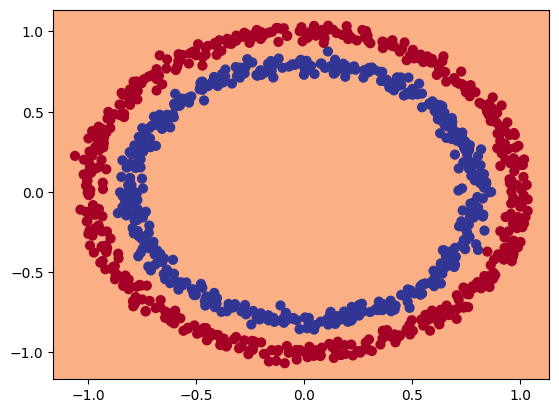

In [ ]:
# Lets visualize the model now:

plot_decision_boundary(model = model_7,
                       X = X,
                       y = y)

In [ ]:
# Lets evaluate our model;
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

lets try to add the output activation as sigmoid and see how the model predicts:

In [ ]:
# Lets go fancy and try the multilayer NN:

tf.random.set_seed(42)

# 1. create the model:
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# 2. compiling the model:

model_8.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ['accuracy'])
# 3. Lets fir the model:
history = model_8.fit(X, y , epochs= 250)

Epoch 1/250
32/32 [==============================] - 2s 4ms/step - loss: 0.7323 - accuracy: 0.4950
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 0.7181 - accuracy: 0.4790
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 0.7102 - accuracy: 0.4650
Epoch 4/250
32/32 [==============================] - 0s 4ms/step - loss: 0.7057 - accuracy: 0.4590
Epoch 5/250
32/32 [==============================] - 0s 4ms/step - loss: 0.7029 - accuracy: 0.4810
Epoch 6/250
32/32 [==============================] - 0s 4ms/step - loss: 0.7012 - accuracy: 0.4740
Epoch 7/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6994 - accuracy: 0.4780
Epoch 8/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6983 - accuracy: 0.4660
Epoch 9/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6970 - accuracy: 0.4620
Epoch 10/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6961 - accuracy: 0.4440
Epoch 11/

In [ ]:
# Lets Evaluate the model:
model_8.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.1091 - accuracy: 0.9830


[0.10914252698421478, 0.9829999804496765]

313/313 [==============================] - 0s 1ms/step
Binary Calssification:


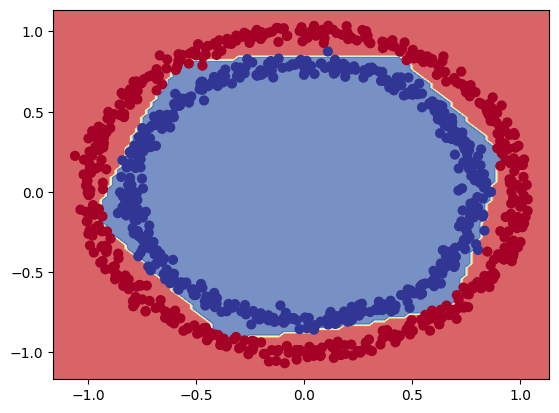

In [ ]:
# Lets visualize the models predicstion:
plot_decision_boundary(model = model_8,
                       X = X,
                       y = y)

WOW !!! It is now clearly able to seprate out the two classes.

* By Intrducing the sigmoid activation  function the accuracy has increased a lot, this shows using a proper activation function is critical.

* But what is sigmpid activation function???

* Sigmoid activation function is a non linear transformation function which is given by,

  **sigmoid(x) = 1/(1+exp(-x)**

In [ ]:
# Lets build a toy dataset to and build our own sigmoid function:

A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

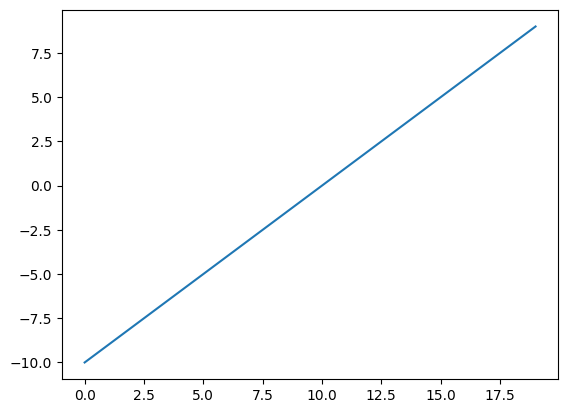

In [ ]:
plt.plot(A)

In [ ]:
# Lets build a model that takes in the value and return the sigmoid transformed output:

def sigmoid(x):
  return 1/(1 + tf.exp(-x))

# using sigmoid on A
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

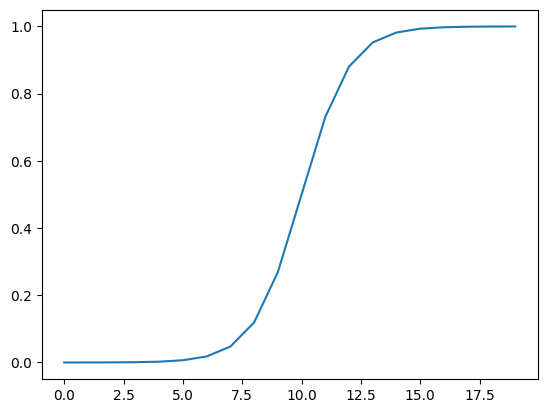

In [ ]:
# Lets plot the output:
plt.plot(sigmoid(A));

* This is what sigmoid does, it trasnforms the data in the range of [0,1].

* Since it is not a straight line it is able to understand the non linearity in the data just what we had in oor circles data.

In [ ]:
# similarity lets build a relu function:
def relu(x):
  return tf.maximum(0,x)

# Lets fit this to A:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

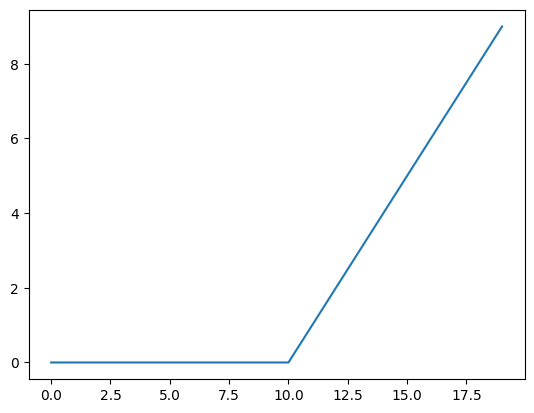

In [ ]:
# lets plot the data:
plt.plot(relu(A));

In [ ]:
# Now lets try the linear activation function:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

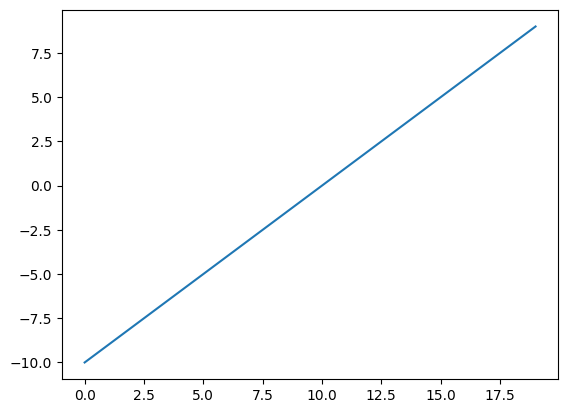

In [ ]:
plt.plot(tf.keras.activations.linear(A))

Linear activation function returns the same output as the tensor.

## Evaluating and Improving our classification Model:

SO far we have training and testing on the same dataset.

But it is really important that we dont do it, we should always has training and testing dataset separate.

In [ ]:
# lest check how many examples we have:
len(X)

1000

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
# Lets recreate our model to fit on the traning the data and test it on testing data:

tf.random.set_seed(42)

# 1. building the model:

Model = tf.keras.Sequential(
    [
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid') 
    ]
)

# 2. compile the model:
Model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ['accuracy'])

# 3. fitting the model:
history_8 = Model.fit(X_train, y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 1s 4ms/step - loss: 0.6816 - accuracy: 0.5550
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6683 - accuracy: 0.5913
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6519 - accuracy: 0.6800
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6317 - accuracy: 0.7350
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6144 - accuracy: 0.7013
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5817 - accuracy: 0.7800
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5486 - accuracy: 0.8050
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5205 - accuracy: 0.8150
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4887 - accuracy: 0.8450
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4634 - accuracy: 0.8562
Epoch 11/25
25/25 [

In [ ]:
# 4. evaluate the model on test data:

Model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2185 - accuracy: 0.9300


[0.21849429607391357, 0.9300000071525574]

In the above Model, i have incresed the learning rate from 0.001 to 0.01.

* By increasing the LR the optimizers will take less number if iterarions ti find the minima.
* Hence by increasing the LR we decrease the training time and it take lesser epochs to train the model. 

313/313 [==============================] - 1s 2ms/step
Binary Calssification:
313/313 [==============================] - 1s 2ms/step
Binary Calssification:


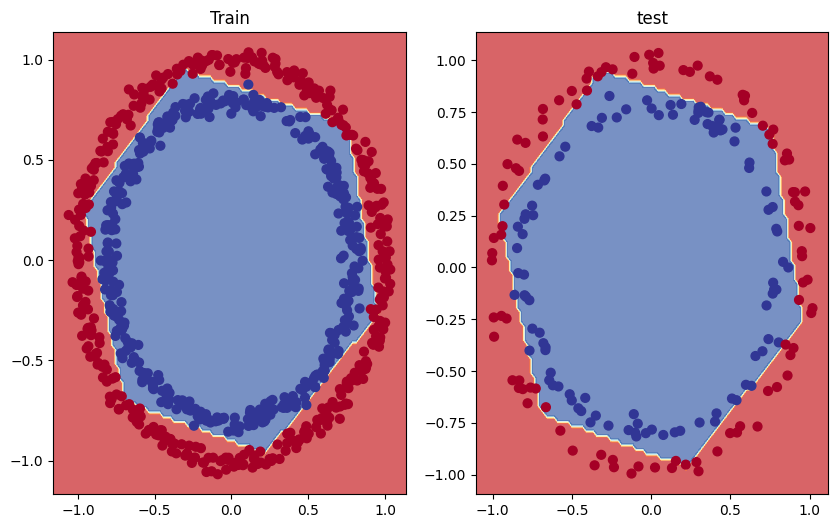

In [ ]:
# Lest plot the decision boundary

plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(Model, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(Model, X_test, y_test)
plt.show();

Thats the perfect classification of the dataset.

## Plot the loss curves:

* When we complie and fit the data, tensorflow creates and object called history.

* history object stores the information about the loss and accuracy for each of the epochs

In [ ]:
history_8.history

{'loss': [0.6815506219863892,
  0.6683245897293091,
  0.6519298553466797,
  0.6316773295402527,
  0.6143691539764404,
  0.5817067623138428,
  0.5485775470733643,
  0.5204920768737793,
  0.48866206407546997,
  0.46344175934791565,
  0.4217606484889984,
  0.39123284816741943,
  0.36761996150016785,
  0.3394845724105835,
  0.3188052773475647,
  0.2936580777168274,
  0.280410498380661,
  0.2529671788215637,
  0.24882003664970398,
  0.22419750690460205,
  0.22781892120838165,
  0.20540736615657806,
  0.19223634898662567,
  0.17628471553325653,
  0.17147016525268555],
 'accuracy': [0.5550000071525574,
  0.5912500023841858,
  0.6800000071525574,
  0.7350000143051147,
  0.7012500166893005,
  0.7799999713897705,
  0.8050000071525574,
  0.8149999976158142,
  0.8450000286102295,
  0.856249988079071,
  0.9112499952316284,
  0.9237499833106995,
  0.9237499833106995,
  0.9300000071525574,
  0.9549999833106995,
  0.956250011920929,
  0.9487500190734863,
  0.9637500047683716,
  0.9624999761581421,
  0

In [ ]:
# Lets convert it to dataframe:
history_data = pd.DataFrame(history_8.history)
history_data.head()

,loss,accuracy
0,0.681551,0.55500
1,0.668325,0.59125
2,0.651930,0.68000
3,0.631677,0.73500
4,0.614369,0.70125


Text(0.5, 1.0, 'Model loss curves')

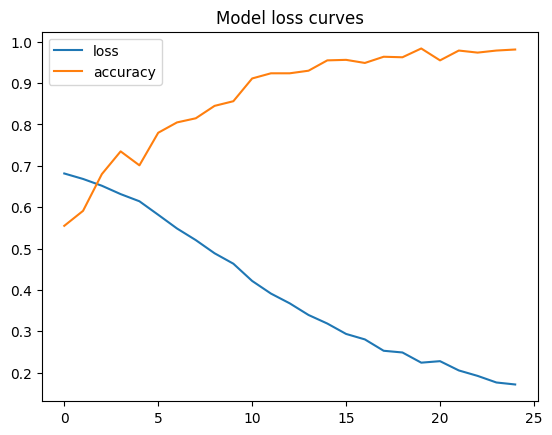

In [ ]:
# Lets plot the curves:

history_data.plot()
plt.title("Model loss curves")

**NOTE**: 
For many problems if the loss funtion is gng down and aacuracy is gng up it means model is performing good.

## Finding the best learning rate:

To find the ideal learning rate, were going to use the following steps:

* A learning rate **callback** 
* Build another model
* A modified loss curves plot.

In [ ]:
tf.random.set_seed(42)

# 1. create the model:
Model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

#2. Compile the model:
Model_9.compile(loss = 'binary_crossentropy',
                optimizer = 'Adam',
                metrics = ['accuracy'])

# create a learning rate callback:
lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4*10**(epoch/20))

#3. Fitting the model:

history_9 = Model_9.fit(X_train, 
                        y_train,
                        epochs = 100,
                        callbacks = [lr_callback])


Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6928 - accuracy: 0.5025 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.4963 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5025 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5013 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5000 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5025 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.5050 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

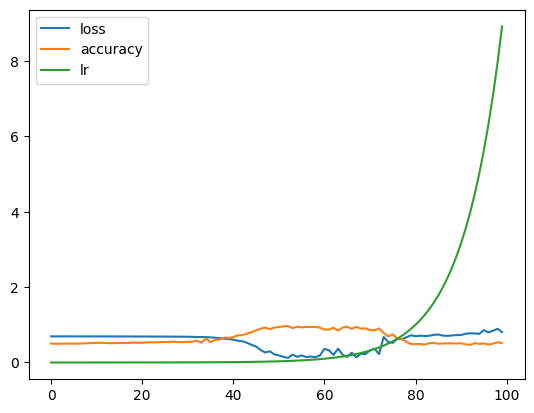

In [ ]:
# Lets plot the data:
pd.DataFrame(history_9.history).plot()
plt.legend()

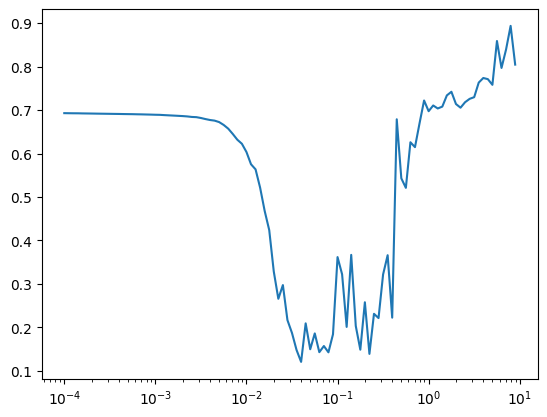

In [ ]:
# Plot the learning to the loss:

lrs = 1e-4*(10**(tf.range(100)/20))
plt.semilogx(lrs, history_9.history['loss'])

In [ ]:
# Lets try using higher ideal Learning Rate with the same model.

tf.random.set_seed(42)

# 1. creating a model:
Model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# 2. Compile the model:
Model_10.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics = ['accuracy']
)

# 3. fit the model:
history_10 = Model_10.fit(X_train, y_train, epochs = 20)

Epoch 1/20
25/25 [==============================] - 3s 3ms/step - loss: 0.6944 - accuracy: 0.4963
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 0.5238
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6783 - accuracy: 0.5537
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6637 - accuracy: 0.5987
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6300 - accuracy: 0.6900
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5857 - accuracy: 0.7163
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4540 - accuracy: 0.9025
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3133 - accuracy: 0.9700
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2037 - accuracy: 0.9775
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1525 - accuracy: 0.9812
Epoch 11/20
25/25 [

In [ ]:
Model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 8ms/step - loss: 0.0532 - accuracy: 0.9850


[0.053217340260744095, 0.9850000143051147]

## More calssification evaluation methods:

Alongside visualiizng there are other hand full of classification evaluation metrics.

* Accuracy
* Precision
*Recall
*F1-score
* confusion Matrix
* Classification Learn report (sklearn)

In [ ]:
# check the accuracy of our model:
loss, accuracy = Model_10.evaluate(X_test, y_test)
print(f'Model loss on the test set is : {loss}')
print(f'Model Accuracy : {(accuracy*100):.2f}')

7/7 [==============================] - 0s 6ms/step - loss: 0.0532 - accuracy: 0.9850
Model loss on the test set is : 0.053217340260744095
Model Accuracy : 98.50


Let build a confusion Matrix:

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_preds = Model_10.predict(X_test)

# Lets create the confusion Matrix:
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [ ]:
y_preds[:10]

array([[9.9133217e-01],
       [2.0353787e-03],
       [9.9689448e-01],
       [1.9117603e-03],
       [8.2168680e-01],
       [7.3504317e-01],
       [1.4023414e-03],
       [4.8512022e-04],
       [9.9026161e-01],
       [1.2924906e-03]], dtype=float32)

looks like our preds array are come in prediction probabity form.. the standard output from sigmoid activation function.

In [ ]:
# Conver our predcition probablity to binary format and view the first 10.
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Lets create the confusion matrix now:
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  1],
       [ 2, 98]])

Lets plot the confusion matrix:

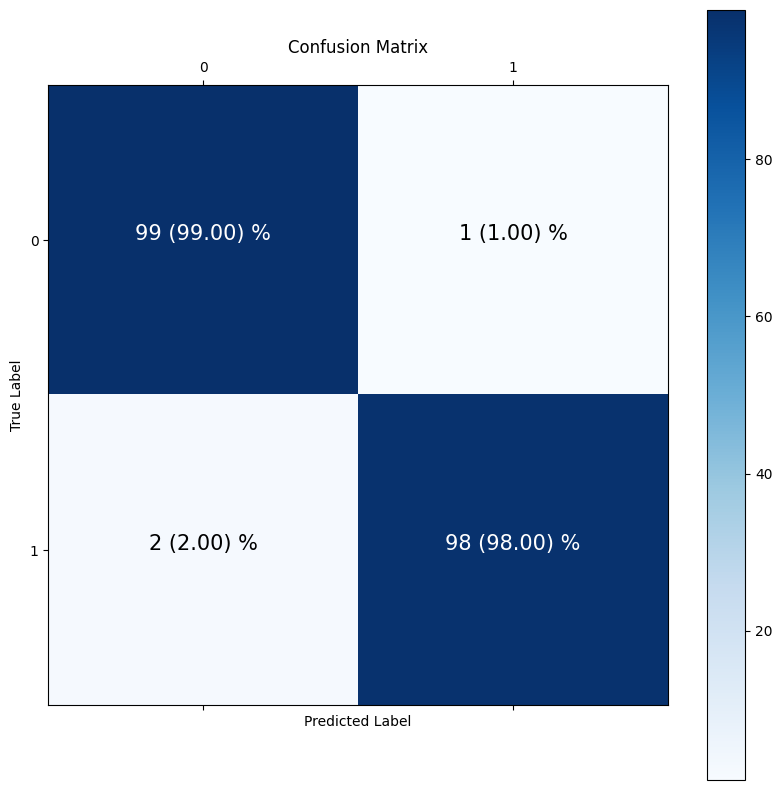

In [ ]:
import itertools

figsize = (10,10)

# Create confusion_matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis]
n_classes = cm.shape[0]

# Lets Pretify it:
fig, ax = plt.subplots(figsize = figsize)
#Create a matrix plot:
cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)

# Create classes:
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title = 'Confusion Matrix',
       xlabel = 'Predicted Label',
       ylabel = 'True Label',
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# Set the threshold for different colors:
threshold = (cm.max() + cm.min())/2

# Plot the text on each cell:

for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.2f}) %",
           horizontalalignment = 'center',
           color = 'white' if cm[i,j]>threshold else 'black',
           size = 15)

# Working with bigger data (Multiclass classification Model):


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_data, train_labels),(test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
# Show the first training example:

print(f"Training sample:\n {train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
# Check the shape of single example:

train_data[0].shape, test_labels[0].shape

((28, 28), ())

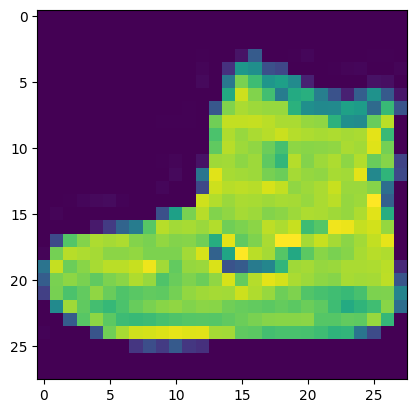

In [ ]:
# Plot a single sample:
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [ ]:
 # Lets check the sam0ples lables:
train_labels[0]

9

In [ ]:
# All the labels are in the numbers, lets label each number with the correct type of dress.

class_names = ['T-shirt/top','Trouser','pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

len(class_names)

10

Text(0.5, 1.0, 'Sandal')

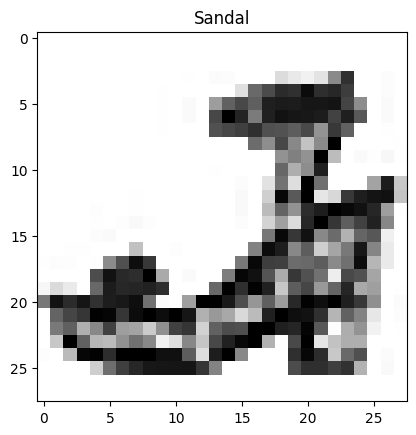

In [ ]:
# Plot an example image and its label:
index_of_choice = 60
plt.imshow(train_data[index_of_choice], cmap= plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

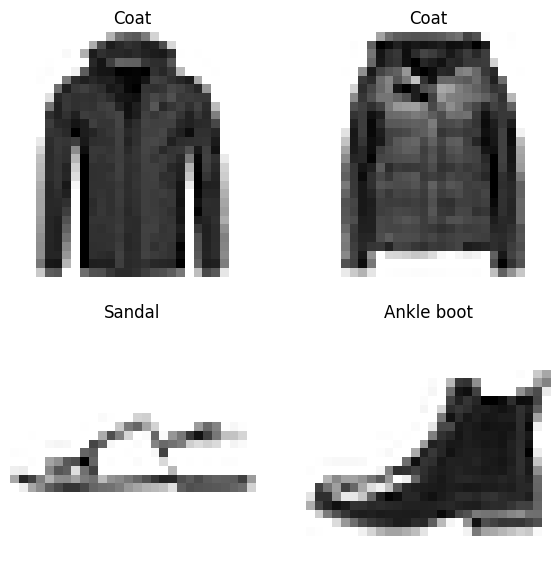

In [ ]:
# plot multiple random images of fashion mnsit:

import random

plt.figure(figsize = (7,7))
for i in range(4):
  ax = plt.subplot(2,2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-clas classification model:

In [ ]:
# set random seed:
tf.random.set_seed(42)

# Create the model:
multi_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)]
)

# Compile the model:
multi_model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Fit the model:
non_norm_history = multi_model.fit(train_data, tf.one_hot(train_labels, depth = 10), epochs = 10,validation_data = (test_data, tf.one_hot(test_labels, depth = 10)))

Epoch 1/10
1875/1875 [==============================] - 13s 3ms/step - loss: 2.3247 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0452 - accuracy: 0.1789 - val_loss: 1.7784 - val_accuracy: 0.2551
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7101 - accuracy: 0.2711 - val_loss: 1.6684 - val_accuracy: 0.2794
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6382 - accuracy: 0.3069 - val_loss: 1.6143 - val_accuracy: 0.3257
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6047 - accuracy: 0.3206 - val_loss: 1.5894 - val_accuracy: 0.3302
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5839 - accuracy: 0.3282 - val_loss: 1.5711 - val_accuracy

In [ ]:
# Lets check the model summary:
multi_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


* Our model is performing is just better than random guessing, it is having around 30% accuracy.
 
* Lets try to improve it.

In [ ]:
# Since the images are in the form of matrix with pixel values it has wide range of values so lets try to normlaize the data.

train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data.min(), train_data.max(), train_data_norm.min(), train_data_norm.max()

(0, 255, 0.0, 1.0)

Now our data is nomrlaized from (0,255) to (0.1.0).

Lets fit the exactly same model with the normalized data.

In [ ]:
# set random seed:
tf.random.set_seed(42)

# Create the model:
multi_model_norm = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)]
)

# Compile the model:
multi_model_norm.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Fit the model:
norm_history = multi_model_norm.fit(train_data_norm, tf.one_hot(train_labels, depth = 10), epochs = 10,validation_data = (test_data_norm, tf.one_hot(test_labels, depth = 10)))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4091 - accuracy: 0.4723 - val_loss: 1.0060 - val_accuracy: 0.6130
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.8809 - accuracy: 0.6623 - val_loss: 0.8199 - val_accuracy: 0.6788
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7472 - accuracy: 0.7129 - val_loss: 0.7249 - val_accuracy: 0.7281
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6567 - accuracy: 0.7639 - val_loss: 0.6541 - val_accuracy: 0.7625
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6156 - accuracy: 0.7781 - val_loss: 0.6417 - val_accuracy: 0.7739
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5885 - accuracy: 0.7966 - val_loss: 0.6033 - val_accuracy: 0.7942
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5651 - accuracy: 0.8078 - val_loss: 0.6168 - val_accuracy:

**Note :** Neural Network tends to prefer numericla form as well as scaled/normalized data.

<Axes: title={'center': 'normlaized data'}>

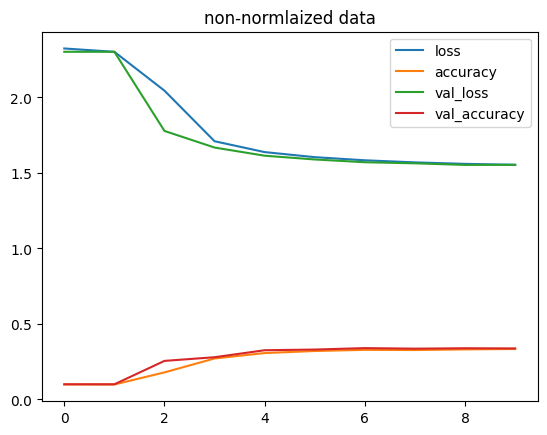

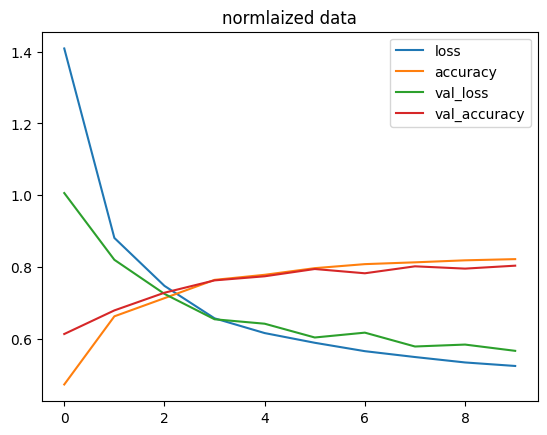

In [ ]:
# Lets compare nnon normlaized and normlaized model results:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title = 'non-normlaized data')
pd.DataFrame(norm_history.history).plot(title = 'normlaized data')

A small change in the data can produce a significant different results.

## Finding the ideal Learning Rate:

In [ ]:
# Set the seed.

tf.random.set_seed(42)

# Create the model:
multi_model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compile the model:
multi_model2.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Create the learning rate callback.

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

# Fit the model:
find_lr_history = multi_model2.fit(train_data_norm, train_labels, epochs=40, validation_data = (test_data_norm, test_labels), callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3624 - accuracy: 0.5339 - val_loss: 0.9893 - val_accuracy: 0.6590 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8701 - accuracy: 0.6882 - val_loss: 0.8161 - val_accuracy: 0.6964 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7519 - accuracy: 0.7258 - val_loss: 0.7364 - val_accuracy: 0.7335 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7043 - accuracy: 0.7451 - val_loss: 0.7079 - val_accuracy: 0.7479 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6799 - accuracy: 0.7558 - val_loss: 0.6897 - val_accuracy: 0.7559 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6464 - accuracy: 0.7733 - val_loss: 0.6716 - val_accuracy: 0.7650 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'Finding the idela learning rate')

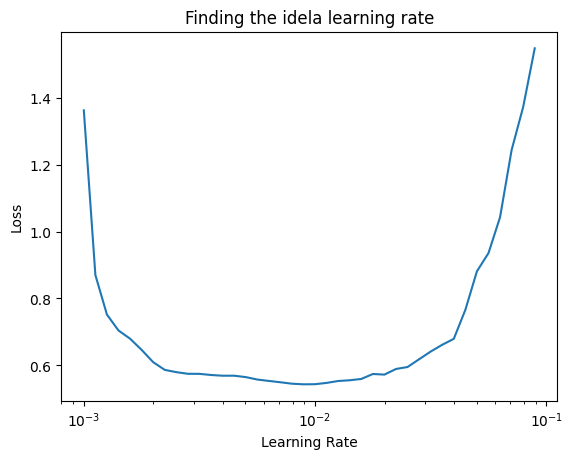

In [ ]:
# Lets plot the loss vs various learning-rates;
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel('Loss')
plt.title('Finding the idela learning rate')

Idela learning_rate is the one that is just before wher there is less loss.

* From the grapgh we can see that 0.001 is the ideal lr, which happens to be the defaulth one for Adam optimizer.

In [ ]:
# Lets use the ideal learning _rate:
# set random seed:
tf.random.set_seed(42)

# Create the model:
multi_model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)]
)

# Compile the model:
multi_model3.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

# Fit the model:
ideal_lr_norm_history = multi_model3.fit(train_data_norm, tf.one_hot(train_labels, depth = 10), epochs = 20,validation_data = (test_data_norm, tf.one_hot(test_labels, depth = 10)))

Epoch 1/20
1875/1875 [==============================] - 12s 3ms/step - loss: 1.1250 - accuracy: 0.5550 - val_loss: 0.8194 - val_accuracy: 0.6875
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7605 - accuracy: 0.7168 - val_loss: 0.7637 - val_accuracy: 0.7191
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7159 - accuracy: 0.7359 - val_loss: 0.7355 - val_accuracy: 0.7406
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6882 - accuracy: 0.7500 - val_loss: 0.7134 - val_accuracy: 0.7440
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6696 - accuracy: 0.7590 - val_loss: 0.6914 - val_accuracy: 0.7558
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6557 - accuracy: 0.7627 - val_loss: 0.6919 - val_accuracy: 0.7545
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6448 - accuracy: 0.7681 - val_loss: 0.6740 - val_accuracy

## Evaluating our multi-class classification model:

To evaluate out multiclass classifcation model we could:

* Evaluate its performance using other classifcation metrics like confusion matrix.
* Asses some of its predictions
* Improve its results.
* Save and export it for use in an application.

In [ ]:
# Lets build a confusion matrix:

import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrx(y_true, y_pred, classes = None, figsize = (10,10), text_size = 10):

  # Create confusion_matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # Lets Pretify it:
  fig, ax = plt.subplots(figsize = figsize)
  #Create a matrix plot:
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title = 'Confusion Matrix',
        xlabel = 'Predicted Label',
        ylabel = 'True Label',
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)
  
  # Adjust label size:
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set the threshold for different colors:
  threshold = (cm.max() + cm.min())/2

  # Plot the text on each cell:

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.2f}) %",
            horizontalalignment = 'center',
            color = 'white' if cm[i,j]>threshold else 'black',
            size = text_size)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Make some predicstions :

# predict the probability of each class: 
y_probs = multi_model3.predict(test_data_norm)

y_probs[:10]

313/313 [==============================] - 1s 1ms/step


array([[2.94059816e-07, 7.04779290e-11, 1.14520677e-04, 8.47224328e-06,
        2.60550365e-07, 1.58589229e-01, 6.51502035e-08, 9.31344926e-02,
        4.72466983e-02, 7.00905979e-01],
       [4.57981187e-05, 5.84696300e-13, 9.56713140e-01, 7.11398752e-05,
        2.55307611e-02, 1.06725996e-19, 1.71336532e-02, 2.62553016e-27,
        5.05477947e-04, 1.61298850e-12],
       [1.23292825e-08, 9.99900579e-01, 1.87552773e-09, 7.01889439e-05,
        2.46847339e-05, 1.11510489e-28, 1.79476238e-08, 9.42696551e-18,
        4.56232920e-06, 3.29313278e-18],
       [9.72124141e-08, 9.99356091e-01, 3.88411570e-09, 6.06359448e-04,
        3.15099205e-05, 1.53092773e-29, 4.14381098e-08, 5.54035516e-17,
        5.87761997e-06, 7.63134665e-17],
       [1.61348045e-01, 6.07462255e-07, 1.55678272e-01, 9.87908710e-03,
        1.15852933e-02, 2.09085457e-10, 6.61324441e-01, 9.92391170e-15,
        1.84262841e-04, 2.99253600e-08],
       [6.49979920e-05, 9.85329688e-01, 1.34927013e-05, 7.73069961e-03,
   

In [ ]:
# Convert all the probabilities into intergers:
y_preds = y_probs.argmax(axis = 1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels 

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Now we can compare the predicted output to the actual test labels.

In [ ]:
# Lets build the confusion matrix:

from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = test_labels,
                 y_pred = y_preds)

array([[750,   2,  12,  76,   3,   4, 136,   0,  15,   2],
       [  2, 939,   0,  39,   8,   0,   6,   0,   6,   0],
       [ 11,   0, 661,  12, 176,   1, 124,   0,  15,   0],
       [ 43,  11,   9, 835,  37,   1,  49,   1,  14,   0],
       [  0,   2,  77,  34, 791,   0,  83,   0,  13,   0],
       [  2,   0,   0,   0,   0, 925,   0,  41,  13,  19],
       [148,   7, 125,  40, 160,   3, 497,   1,  19,   0],
       [  0,   0,   0,   0,   0,  43,   0, 927,   1,  29],
       [  3,   6,  15,  11,  10,  15,  13,   5, 922,   0],
       [  2,   0,   0,   0,   0,  33,   0,  47,   2, 916]])

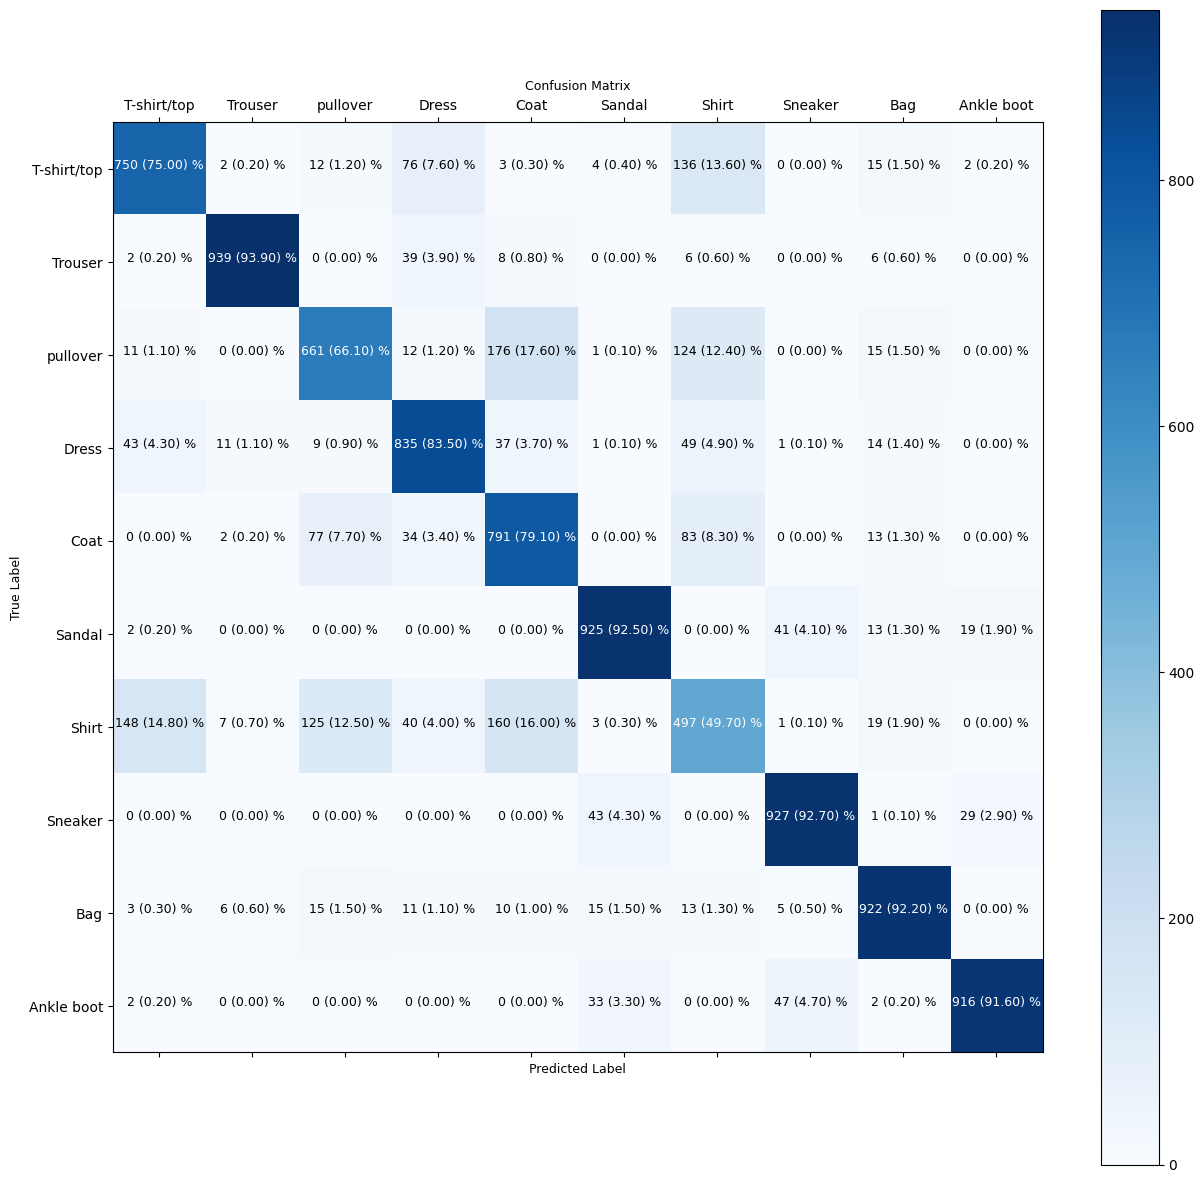

In [ ]:
# Lets plot it in a pretty manner:

make_confusion_matrx(
    y_true = test_labels,
    y_pred = y_preds,
    classes = class_names,
    figsize = (15,15),
    text_size = 9)

In [ ]:
def plot_random_image(model, images, true_labels, classes):
  '''
  Picks a random image, plots it and labels it with a prediction and truth labels.
  '''

  # set the random integer:
  i = random.randint(0, len(images))

  # Create prediction and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28,28))
  pred_labels = classes[pred_probs.argmax()]
  true_labels = classes[true_labels[i]]

  #Plot the image:
  plt.imshow(target_image, cmap = plt.cm.binary)

  #change the color of titles based on the predictins:
  if pred_labels == true_labels:
    color = 'green'
  else:
    color = 'blue'

  # Add xlabel information (prediction/true label)
  plt.xlabel("pred: {} {:.2f} % (True: {})".format(pred_labels, 100*tf.reduce_max(pred_probs),true_labels), color = color)

1/1 [==============================] - 0s 19ms/step


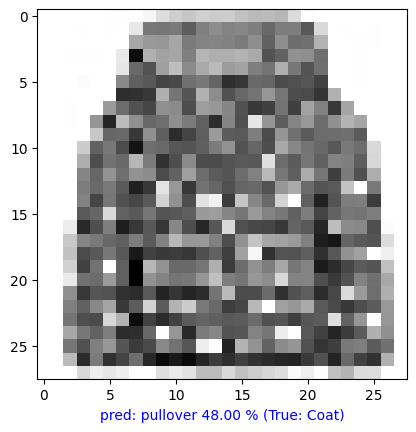

In [ ]:
plot_random_image(
    model= multi_model3,
    images = test_data_norm,
    true_labels = test_labels,
    classes = class_names
)

## What patterns is our model learning?

In [ ]:
# Find the layers f our model recent model:
multi_model3.layers

In [ ]:
# Get the patters of the layer in our network:
weights, biases = multi_model3.layers[1].get_weights()

In [ ]:
weights, weights.shape

(array([[-0.31066358, -0.05132681,  0.8369432 , -0.15714441],
        [-0.79622555,  0.0727382 ,  0.36783054,  0.05147449],
        [ 0.1546365 ,  0.08339675,  0.68115467, -1.136289  ],
        ...,
        [-0.2758153 , -0.00929365, -0.10731512, -0.31906056],
        [-0.29279575, -0.048609  , -0.3169938 , -0.6417234 ],
        [-0.50534534, -0.05310453,  0.6678548 , -0.48119086]],
       dtype=float32),
 (784, 4))

In [ ]:
multi_model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
weights, biases = multi_model3.layers[2].get_weights()

In [ ]:
weights, weights.shape

(array([[-0.8282879 , -0.64658636,  0.81544137,  0.20602116],
        [ 0.04272312,  0.43703118,  0.33850887,  0.877537  ],
        [-0.5259255 ,  0.9401906 ,  1.1214627 ,  0.21263209],
        [-0.7006071 ,  0.73285633, -0.6834671 ,  2.2696898 ]],
       dtype=float32),
 (4, 4))

Now lets check the bias vector

In [ ]:
biases, biases.shape

(array([ 0.        , -0.08689739,  0.6801433 , -0.15818371], dtype=float32),
 (4,))

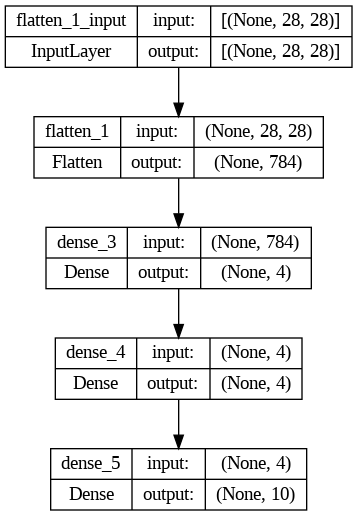

In [ ]:
# Lets visualize the actual model:
from tensorflow.keras.utils import plot_model

# Lets plot the model:
plot_model(multi_model3, show_shapes = True)